In [1]:
import numpy as np
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

In [4]:

R=1
ps=np.array([[1,0],[2,0],[3,0]])
n_p = len(ps)
max_speed=0.22
dt = 1
n_steps = 300
p_trajs=[]

step_size = max_speed*dt
ps=ps.reshape(-1,2)

origin= np.mean(ps,axis = 0)

phi = 2*np.pi/n_p
destinations = origin + R * np.array([[np.cos(phi*j),np.sin(phi*j)] for j in range(n_p)])
np.array([ps,destinations])

array([[[ 1.       ,  0.       ],
        [ 2.       ,  0.       ],
        [ 3.       ,  0.       ]],

       [[ 3.       ,  0.       ],
        [ 1.5      ,  0.8660254],
        [ 1.5      , -0.8660254]]])

In [10]:
step_size = max_speed*dt
ps=ps.reshape(-1,2)

phi = 2*np.pi/n_p

CoM = np.mean(ps,axis = 0)

destinations = CoM + R * np.array([[np.cos(phi*j),np.sin(phi*j)] for j in range(n_p)])

# reached = np.all(np.linalg.norm(destinations-ps,axis=1)<epsilon)

dists = np.repeat(step_size* np.arange(n_steps+1),n_p).reshape(-1,n_p)
max_dists = np.linalg.norm(destinations-ps,axis=1)
for i in range(n_p):
    dists[:,i][dists[:,i]>max_dists[i]]=max_dists[i]

directions = np.expand_dims((((destinations-CoM).T/np.linalg.norm(destinations-ps,axis=1)).T),axis=2)

directions = np.transpose(directions,(2,0,1))

directions = np.repeat(directions,len(dists),axis=0)

waypoints = directions*dists[:,:,np.newaxis] + CoM

In [17]:
np.all(np.linalg.norm(ps-CoM,axis=1)>R)

False

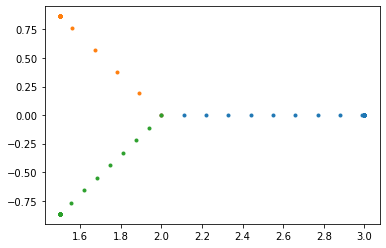

In [12]:
for i in range(n_p):
    plt.plot(waypoints[:,i,0],waypoints[:,i,1],'.')